# Keras Intensive Run

Instructions
1. Define the global variables;
2. Run the second snippet. It builds the network and saves the output to a folder displayed on the console.

In [3]:
# TEST VARIABLES
labelsGroup = [
    ["happy", "sad"],
]
iterationsGroup = [100]
hiddenLayersGroup = [
    [144],
]
batchSize = 128
hyperParametersGroup = [0, 0.01]

In [91]:
# GLOBAL VARIABLES
labelsGroup = [
    ["angry", "fear", "happy", "neutral", "sad", "surprise"],
    # ["fear", "angry", "surprise", "neutral"],
    # ["fear", "angry", "surprise"],
    # ["fear", "angry"],
    # ["fear", "sad", "happy"],
    # ["happy", "angry", "neutral"],
    # ["happy", "sad"]
]
iterationsGroup = [5000]
hiddenLayersGroup = [
    # [144],
    [144, 144],
    [300,200,100,50],
    [300,100,100,100],
]
batchSize = 128
hyperParametersGroup = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

In [4]:
def confusionMatrix(labels, pred, y):
    
    confusionTFPN = {}
    confusionLabels = {}
    
    # Foreach emotion
    for ie in range(len(labels)):
        # TRUE AND FALSE POSITIVES AND NEGATIVES (TFPN)
        
        # Get indexes where emotion was predicted
        ieIndexesPred = [i for i in range(pred.size) if pred[i]==ie]
        ieIndexesNotPred = [i for i in range(pred.size) if pred[i]!=ie]

        # Predicted, and Actual
        TP = sum(pred[:,np.newaxis][ieIndexesPred]==y[ieIndexesPred])
        # Predicted, but not actual
        FP = sum(pred[:,np.newaxis][ieIndexesPred]!=y[ieIndexesPred])
        # Not predicted, but actual
        FN = sum(y[ieIndexesNotPred]==ie)
        # Not predicted and not actual
        TN = sum(y[ieIndexesNotPred]!=ie)

        TP = TP[0] if TP else 0
        FP = FP[0] if FP else 0
        FN = FN[0] if FN else 0
        TN = TN[0] if TN else 0
        
        confusionTFPN[labels[ie]] = {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }
        
        # CONFUSION WITH OTHER labels (Confusion)
        # For emotion e
        # Count the number of predictions made for all classes
        # Foreach emotion, check how many times it has been predicted 
        
        # Get indexes where emotion is real
        ieIndexesY = [i for i in range(y.size) if y[i]==ie]
        
        # Foreach matching prediction, check what emotion was predicted
        confusionLabels[labels[ie]] = {
            e: sum(pred[:,np.newaxis][ieIndexesY]==labels.index(e))[0] for e in labels
        }
        
    return confusionTFPN, confusionLabels

def outputConfusionTables(labels, testExamplesNumber, confusionTFPN, confusionLabels, axs, axsLine, axsTitle):
     # TABLES
    rows = tuple(labels)
    
    # TABLES / TFPN
    # Output confusion matrix as plot table
    data = [
        [
            f"{vals['TP']} ({vals['TP']/testExamplesNumber*100:.2f}%)",
            f"{vals['TN']} ({vals['TN']/testExamplesNumber*100:.2f}%)",
            f"{vals['TP']+vals['TN']} ({(vals['TP']+vals['TN'])/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']} ({vals['FP']/testExamplesNumber*100:.2f}%)",
            f"{vals['FN']} ({vals['FN']/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']+vals['FN']} ({(vals['FP']+vals['FN'])/testExamplesNumber*100:.2f}%)",
            vals['FP']+vals['FN']+vals['TP']+vals['TN']
        ]
        for _, vals in confusionTFPN.items()
    ]
    columns = ['TP (%)', 'TN (%)', 'T (%)', 'FP (%)', 'FN (%)', 'F (%)', f"Total"]
    
    # Colorize cells depending on value
    cellColoursTF=plt.cm.Blues([
        [ (vals['TP']+vals['TN'])/testExamplesNumber, (vals['FP']+vals['FN'])/testExamplesNumber ] for _, vals in confusionTFPN.items()
    ])
    cellColourPos=plt.cm.Greens([
        [ vals['TP']/(vals['TP']+vals['FP']), vals['FP']/(vals['TP']+vals['FP']) ] for _, vals in confusionTFPN.items()
    ])
    cellColourNeg=plt.cm.Reds([
        [ vals['TN']/(vals['TN']+vals['FN']), vals['FN']/(vals['TN']+vals['FN']) ] for _, vals in confusionTFPN.items()
    ])
    
    cellColours = [
        [
            cellColourPos[i][0],
            cellColourNeg[i][0],
            cellColoursTF[i][0],
            cellColourPos[i][1],
            cellColourNeg[i][1],
            cellColoursTF[i][1],
            [0, 0, 0, 0]
        ]
        for i in range(len(rows))
    ]
        
    the_table = axs[axsLine].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    # the_table.scale(1.2, 1)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(20)
    axs[axsLine].axis('off')
    axs[axsLine].axis('tight')
    axs[axsLine].set_title(f"Confusion matrix {axsTitle}", fontsize=20, pad=0)    
    
    # TABLES / Confusion    
    # Output confusion matrix as plot table
    data = [[o for _,o in others.items()] for _,others in confusionLabels.items()]
    columns = rows
    
    # Colorize cells depending on value
    vals = [o for _,others in confusionLabels.items() for _,o in others.items()]
    normal = plt.Normalize(min(vals)-1, max(vals)+1)
    cellColours=plt.cm.Blues(normal(data))
        
    the_table = axs[axsLine+1].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    
    the_table.set_fontsize(20)
    # the_table.scale(1, 4)
    axs[axsLine+1].axis('off')
    axs[axsLine+1].axis('tight')
    axs[axsLine+1].set_title(f"True/Predicted {axsTitle}", fontsize=20)



LABELS happy, sad
Loaded 2000 traing examples with 2 labels, each with 2304 features (pixels).
Loaded 400 dev examples.
Loaded 400 test examples.

144

Building network for 100 iterations and batch size of 128 and 1 hidden layers: 144...
Without regularization!

Epoch 1/100
16/16 [==============================] - 1s 22ms/step - loss: 0.8405 - accuracy: 0.5070 - val_loss: 0.6771 - val_accuracy: 0.5775
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.5646 - val_loss: 0.6645 - val_accuracy: 0.5800
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6666 - accuracy: 0.5852 - val_loss: 0.6600 - val_accuracy: 0.6100
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.6131 - val_loss: 0.6563 - val_accuracy: 0.6050
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.6168 - val_loss: 0.6515 - val_accuracy: 0.6125
Epoch 6/100
16/16 [==========

Epoch 50/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5419 - accuracy: 0.7532 - val_loss: 0.5678 - val_accuracy: 0.7000
Epoch 51/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5538 - accuracy: 0.7242 - val_loss: 0.5956 - val_accuracy: 0.6850
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5610 - accuracy: 0.7057 - val_loss: 0.6723 - val_accuracy: 0.6175
Epoch 53/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5754 - accuracy: 0.6849 - val_loss: 0.5611 - val_accuracy: 0.7025
Epoch 54/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5408 - accuracy: 0.7529 - val_loss: 0.6099 - val_accuracy: 0.6575
Epoch 55/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5224 - accuracy: 0.7400 - val_loss: 0.5867 - val_accuracy: 0.7000
Epoch 56/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5337 - accuracy: 0.7493 - val_loss: 0.6191 - val_accuracy: 0.6350
Epoch 

16/16 [==============================] - 1s 17ms/step - loss: 0.8099 - accuracy: 0.5041 - val_loss: 0.7004 - val_accuracy: 0.5200
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.7050 - accuracy: 0.5195 - val_loss: 0.6659 - val_accuracy: 0.5875
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6699 - accuracy: 0.5809 - val_loss: 0.6594 - val_accuracy: 0.6025
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6702 - accuracy: 0.5972 - val_loss: 0.6431 - val_accuracy: 0.6725
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6638 - accuracy: 0.6066 - val_loss: 0.6934 - val_accuracy: 0.5275
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6754 - accuracy: 0.5812 - val_loss: 0.6680 - val_accuracy: 0.5625
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6734 - accuracy: 0.5926 - val_loss: 0.6350 - val_accuracy: 0.6300
Epoch 8/100
16/16 [=====

Epoch 54/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5432 - accuracy: 0.7424 - val_loss: 0.5675 - val_accuracy: 0.7250
Epoch 55/100
16/16 [==============================] - 0s 11ms/step - loss: 0.5824 - accuracy: 0.6992 - val_loss: 0.7361 - val_accuracy: 0.5650
Epoch 56/100
16/16 [==============================] - 0s 12ms/step - loss: 0.6236 - accuracy: 0.6520 - val_loss: 0.5589 - val_accuracy: 0.7400
Epoch 57/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5473 - accuracy: 0.7424 - val_loss: 0.5642 - val_accuracy: 0.7350
Epoch 58/100
16/16 [==============================] - 0s 13ms/step - loss: 0.5473 - accuracy: 0.7435 - val_loss: 0.5555 - val_accuracy: 0.7225
Epoch 59/100
16/16 [==============================] - 0s 11ms/step - loss: 0.5400 - accuracy: 0.7384 - val_loss: 0.5659 - val_accuracy: 0.7275
Epoch 60/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5636 - accuracy: 0.7156 - val_loss: 0.5679 - val_accuracy: 0.7025

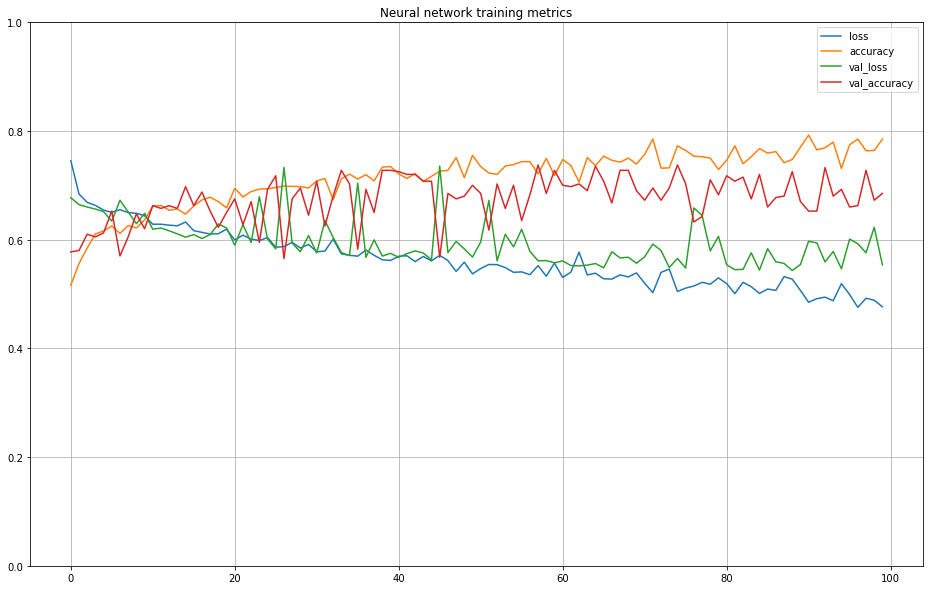

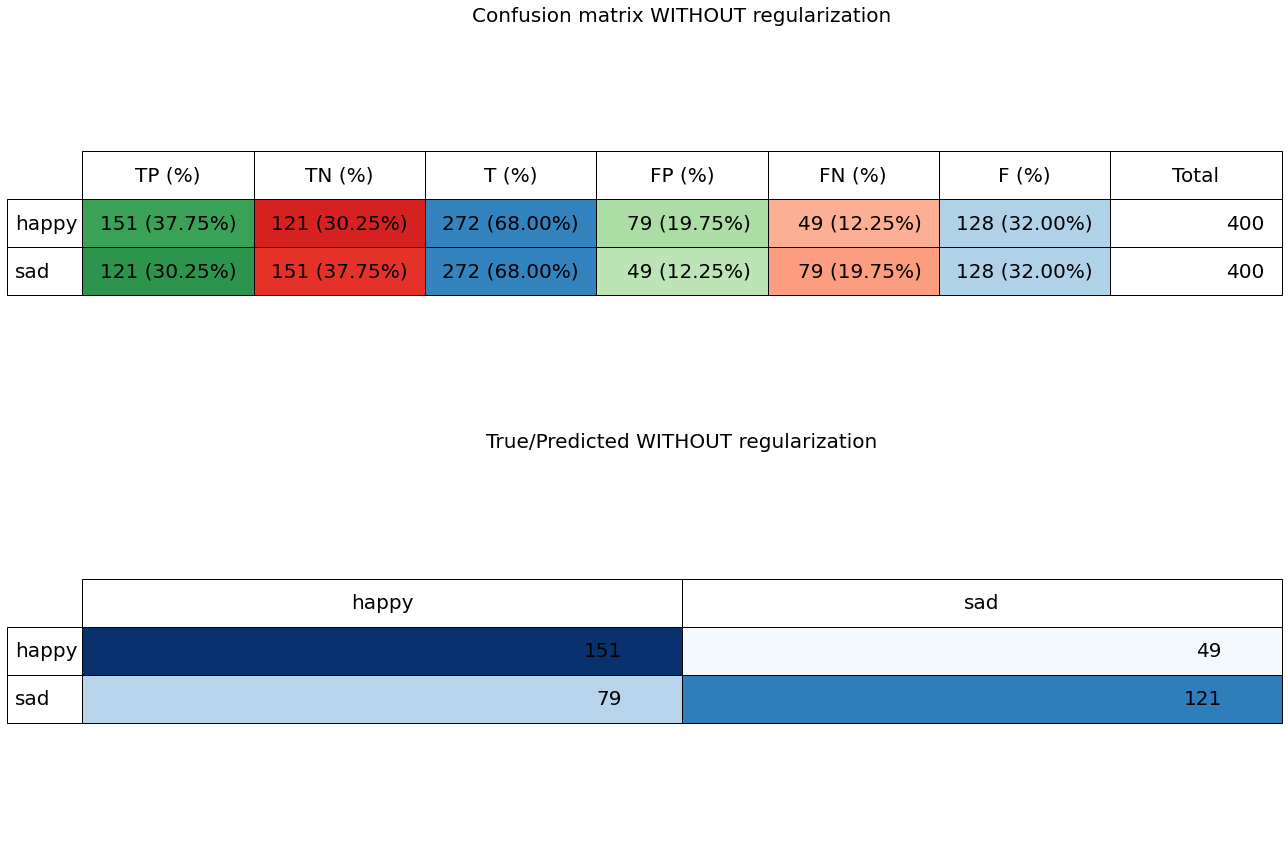

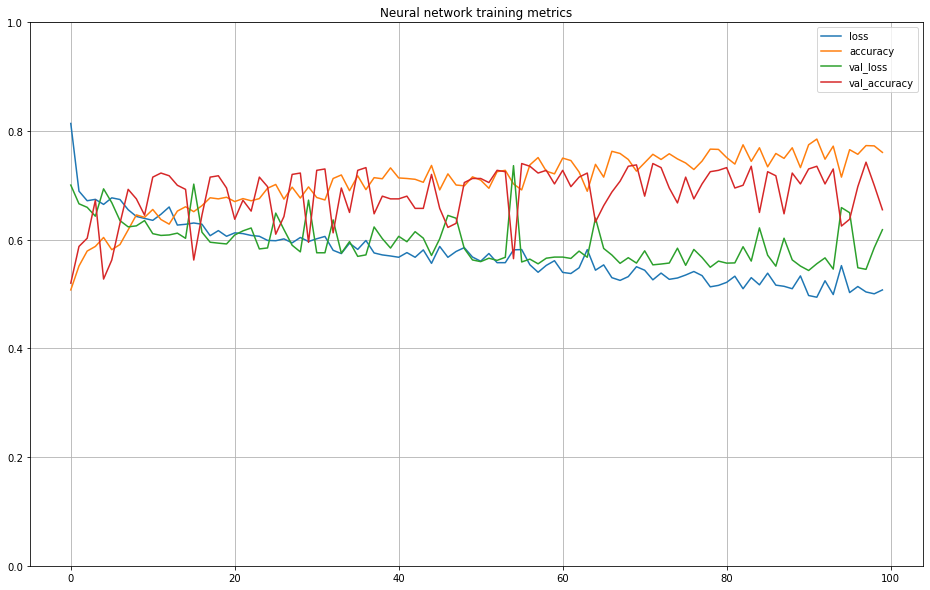

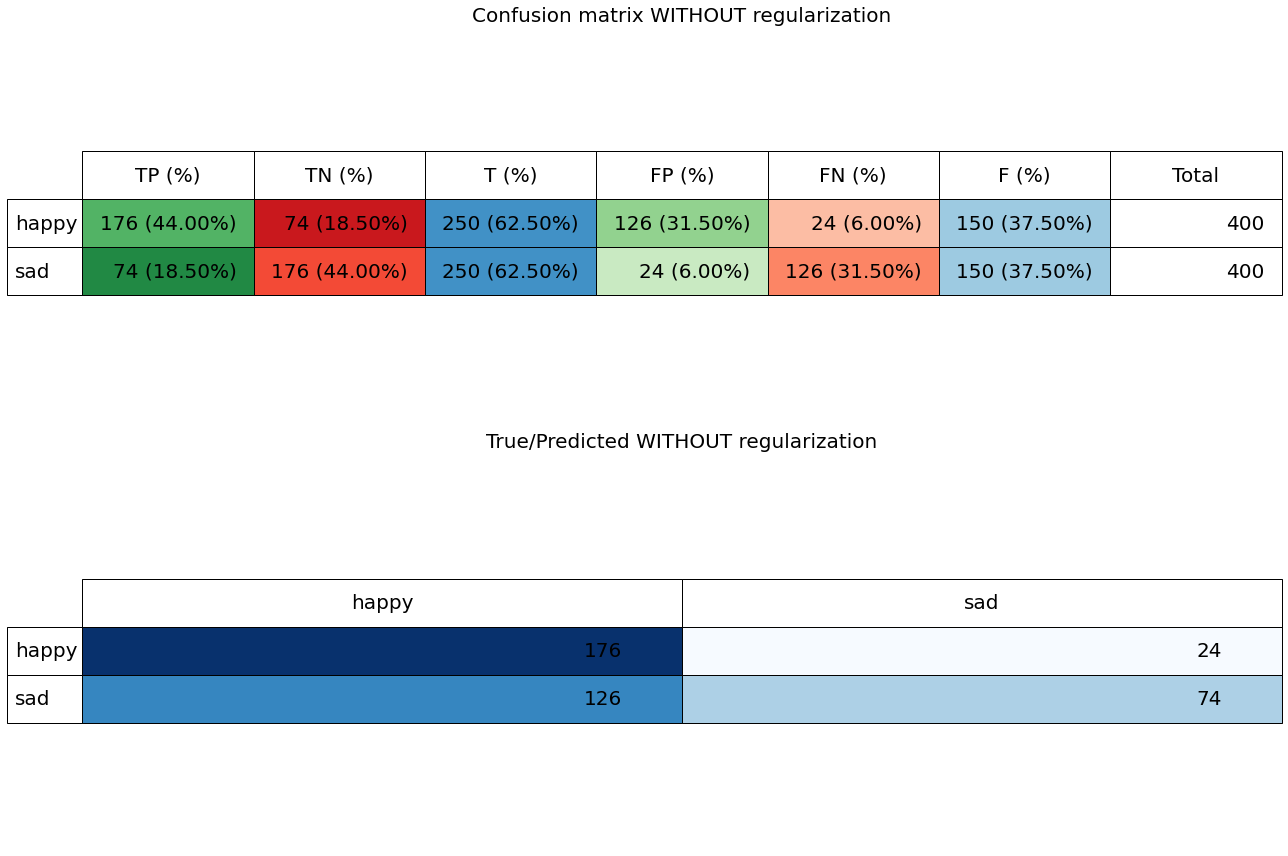

In [5]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for saving metrics
import os 
import json
# for neural network
import tensorflow as tf
from tensorflow import keras

if not os.path.exists('./metrics'):
    os.makedirs('./metrics')

# FOR EACH LABEL GROUP
for labelNames in labelsGroup:
    # LOAD FILES
    print("\n\nLABELS", ', '.join(labelNames))

    # Load Training/Dev/Test data
    mat=loadmat(f"../datasets/train/{'_'.join(labelNames)}.mat")
    X, y = mat["X"], mat["y"]
    matDev=loadmat(f"../datasets/dev/{'_'.join(labelNames)}.mat")
    X_valid, y_valid = matDev["X"], matDev["y"]
    matTest=loadmat(f"../datasets/test/{'_'.join(labelNames)}.mat")
    X_test, y_test = matTest["X"], matTest["y"]
    
    # NUMBERS
    m = X.shape[0] # number of training examples
    labels = np.max(y)+1 # number of labels
    features = X.shape[1] # number of features per example

    # Output user feedback
    print(f"Loaded {m} traing examples with {labels} labels, each with {features} features (pixels).")
    print(f"Loaded {X_valid.shape[0]} dev examples.")
    print(f"Loaded {X_test.shape[0]} test examples.")
    
    print()
    
    # Create folder for metrics
    labelFolder = f"./metrics/{'_'.join(labelNames)}"
    if not os.path.exists(labelFolder):
        os.makedirs(labelFolder)
    if not os.path.exists(f"{labelFolder}/history"):
        os.makedirs(f"{labelFolder}/history")
    if not os.path.exists(f"{labelFolder}/predict"):
        os.makedirs(f"{labelFolder}/predict")
    if not os.path.exists(f"{labelFolder}/archive"):
        os.makedirs(f"{labelFolder}/archive")
    
    # FOREACH HIDDEN LAYER
    for hiddenLayers in hiddenLayersGroup:
        # FOR EACH HYPER PARAMETER
        for hyperParameter in hyperParametersGroup:
            # FOR EACH ITERATION NUMBER
            for iterations in iterationsGroup:
                
                hiddenLayersText = '_'.join(map(str, hiddenLayers)) if len(hiddenLayers)>1 else hiddenLayers[0]
                print(hiddenLayersText)
                combinationName = f"{iterations}iter_{batchSize}batchS_{hyperParameter}hyper_{len(hiddenLayers)}hlayers__{hiddenLayersText}"
                folder = f"{labelFolder}/archive/{combinationName}/"
                if not os.path.exists(folder):
                    os.makedirs(folder)

                print(f"\nBuilding network for {iterations} iterations and batch size of {batchSize} and {len(hiddenLayers)} hidden layers: {hiddenLayersText}...")
                print("With regularization!" if hyperParameter else "Without regularization!")
                print()

                # BUILD NETWORK
                # Create model
                modelSeq = []
                # Flattens each image (48x48) to 1x2304
                modelSeq.append(keras.layers.Flatten(input_shape = [48, 48]))
                # Hidden layers with relu activation function
                for h in hiddenLayers:                        
                    modelSeq.append(keras.layers.Dense(
                        h, 
                        activation = "relu", 
                        bias_regularizer= keras.regularizers.l2(hyperParameter) if hyperParameter else None
                    ))
                # Output layer with softmax activation function
                modelSeq.append(keras.layers.Dense(
                    labels, 
                    activation = "softmax",
                    bias_regularizer= keras.regularizers.l2(hyperParameter) if hyperParameter else None
                ))

                model = keras.models.Sequential(modelSeq)

                # Compile model
                model.compile(
                    # Using sparse categorical crossentropy loss function
                    loss = "sparse_categorical_crossentropy",
                    # Using stochastic gradient descent as gradient descent
                    optimizer = "sgd",
                    # In addition to cost, we want accuracy to help understanding how the model is working 
                    metrics = ["accuracy"]
                )

                # Train the network
                history = model.fit(
                    X,
                    y,
                    epochs = iterations,
                    batch_size = batchSize,
                    validation_data = (X_valid, y_valid)
                )

                # METRICS (SAVE TO FILE)

                # Model training history
                with open(f"{folder}/history.json", "w") as f:
                    json.dump(history.history, f)

                # Test model evaluation
                with open(f"{folder}/evaluation.json", "w") as f:
                    json.dump(model.evaluate(X_test, y_test, return_dict=True), f)

                # Prediction for test data
                with open(f"{folder}/predict.json", "w") as f:
                    json.dump(model.predict(X_test).tolist(), f)

                print(f"\nModel trained and metrics saved to {folder}!")

                # GENERATE GRAPHS AND SAVE TO FILE

                # Model training history
                pd.DataFrame(history.history).plot(figsize = (16, 10))
                plt.grid(True)
                plt.gca().set_ylim(0, 1)
                plt.title("Neural network training metrics")
                plt.savefig(f"{labelFolder}/history/{combinationName}.png")

                # Prediction for test data
                predict = model.predict(X_test)
                y_pred = np.array([np.argmax(p) for p in predict])
                confusionTFPN, confusionLabels = confusionMatrix(labelNames, y_pred, y_test)
                fig, axs = plt.subplots(2,1)
                outputConfusionTables(labelNames, y_test.size, confusionTFPN, confusionLabels, axs, 0, "WITHOUT regularization")
                fig.set_size_inches(18,6*len(labelNames))
                fig.subplots_adjust(left=0.2, top=20)
                fig.tight_layout()
                fig.savefig(f"{labelFolder}/predict/{combinationName}.png")

---

## Analysis

In [100]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for saving metrics
import os 
import json

In [101]:
# GLOBAL VARIABLES
labels = ["angry", "fear", "happy", "neutral", "sad", "surprise"]

In [225]:
import re 
import json

values = {}

# Get values from files
folders = [f for f in os.listdir(f"./metrics/{'_'.join(labels)}/archive") if os.path.isdir(os.path.join(f"./metrics/{'_'.join(labels)}/archive", f))]
folders.sort(key = lambda folder: (float(re.split("iter_|batchS_|hyper_|hlayers__|_", folder)[2]), '_'.join(re.split("iter_|batchS_|hyper_|hlayers__|_", folder)[4:])))
for folder in folders:
    # Get categories from folder name
    folderSplit = re.split("iter_|batchS_|hyper_|hlayers__|_", folder)
    iterations, batchSize, hyperParam, hiddenNumber = folderSplit[:4]
    hiddenNeurons = folderSplit[4:]
        
    # Get accuracy
    file = f"./metrics/{'_'.join(labels)}/archive/{folder}/evaluation.json"
    if os.path.isfile(file):
        data = json.load(open(file, "r"))
        
        if hyperParam not in values.keys(): values[hyperParam]={}
            
        print(folder, data['accuracy'])
        
        values[hyperParam]['_'.join(hiddenNeurons)] = data['accuracy']   
        

5000iter_128batchS_0hyper_1hlayers__144 0.3474999964237213
5000iter_128batchS_0hyper_2hlayers__144_144 0.35249999165534973
5000iter_128batchS_0hyper_4hlayers__300_100_100_100 0.3541666567325592
5000iter_128batchS_0hyper_4hlayers__300_200_100_50 0.36500000953674316
5000iter_128batchS_0.001hyper_1hlayers__144 0.35249999165534973
5000iter_128batchS_0.001hyper_2hlayers__144_144 0.35083332657814026
5000iter_128batchS_0.001hyper_4hlayers__300_100_100_100 0.3541666567325592
5000iter_128batchS_0.001hyper_4hlayers__300_200_100_50 0.3616666793823242
5000iter_128batchS_0.003hyper_1hlayers__144 0.36250001192092896
5000iter_128batchS_0.003hyper_2hlayers__144_144 0.3449999988079071
5000iter_128batchS_0.003hyper_4hlayers__300_100_100_100 0.3658333420753479
5000iter_128batchS_0.003hyper_4hlayers__300_200_100_50 0.36916667222976685
5000iter_128batchS_0.01hyper_1hlayers__144 0.34833332896232605
5000iter_128batchS_0.01hyper_2hlayers__144_144 0.34416666626930237
5000iter_128batchS_0.01hyper_4hlayers__300_

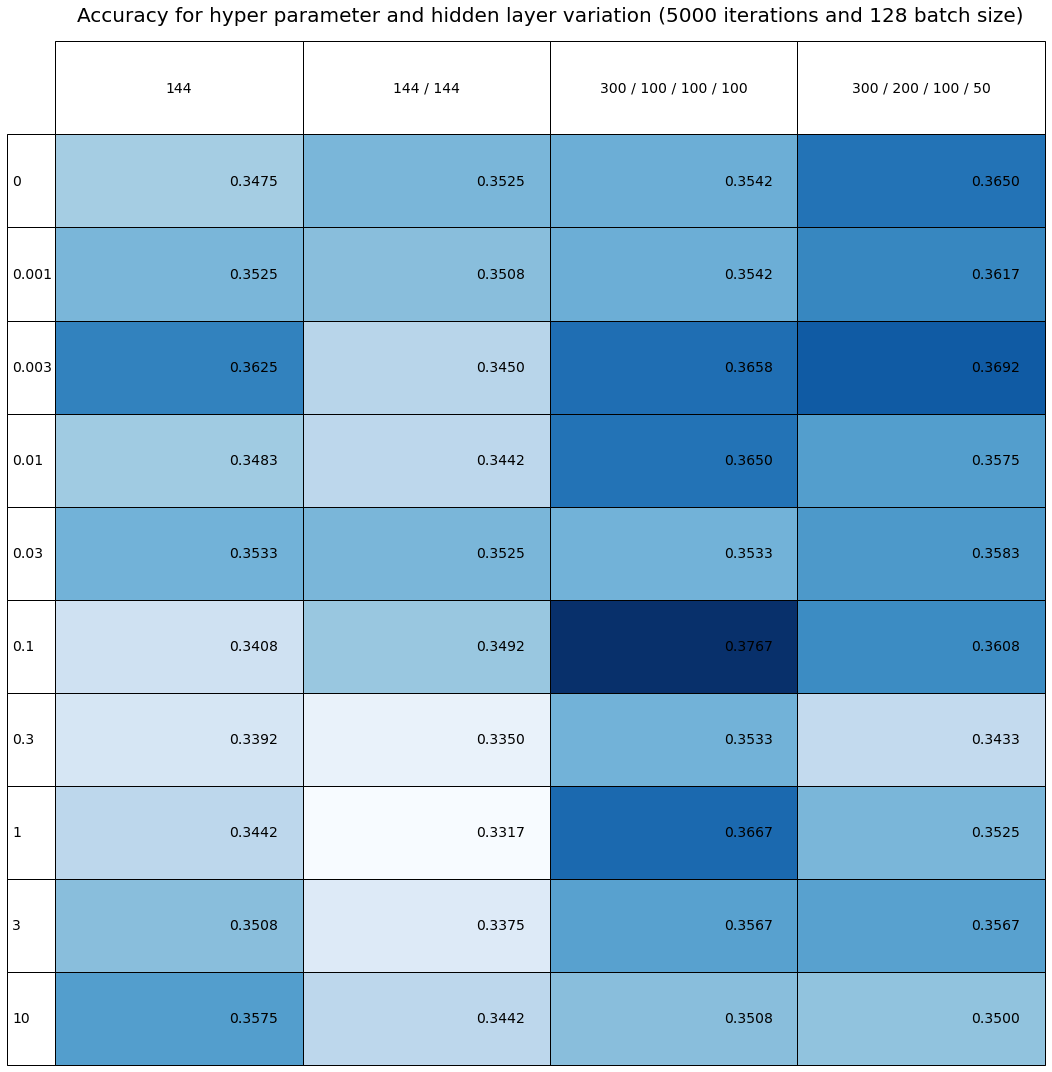

In [228]:
# Output table with relation
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

columns = sorted([hl for hl in list(values[list(values.keys())[0]].keys())])
rows = list(values.keys())
rows.sort(key=lambda x:float(x))

data = [
    [values[r][c] for c in columns]
    for r in rows
]

columns = sorted([' / '.join(hl.split("_")) for hl in columns])

# Colorize cells depending on value
vals = [o for _,others in values.items() for _,o in others.items()]
normal = plt.Normalize(min(vals), max(vals))
cellColours=plt.cm.Blues(normal(data))

the_table = plt.table(
  cellText=[[f'{val:.4f}' for val in lst] for lst in data],
  rowLabels=rows,
  colLabels=columns,
  loc='center',
  cellColours=cellColours,
  bbox=[0.0,0,1,1]
)
# the_table.scale(1.2, 1)
# the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
plt.axis('off')
plt.axis('tight')
plt.title(f"Accuracy for hyper parameter and hidden layer variation ({iterations} iterations and {batchSize} batch size)", fontsize=20, pad=20)    


plt.subplots_adjust(left=0.2, top=20)
plt.tight_layout()

plt.savefig(f"./metrics/{'_'.join(labels)}/accuracyVariation.png")